# Python для исследователей

*Татьяна Рогович, НИУ ВШЭ*

## Библиотека для визуализации данных: matplotlib

Во-первых, кроме привычных вам графиков существует еще огромное множество всего (и некоторые вещи работают гораздо лучше привычных нам). Python умеет строить и сложные штуки.
Есть несколько классных сайтов, которые помогают выбрать подходящий график для ваших данных:

https://www.data-to-viz.com/

https://datavizproject.com/

https://datavizcatalogue.com/RU/

Сегодня мы будем работать с несколькими датасетами, чтобы посмотреть разные виды графиков.


In [1]:
# наша основная библиотека для визуализаций
import matplotlib.pyplot as plt  
import pandas as pd 

# магическая функция, чтобы графики отображались в блокноте под ячейками
%matplotlib inline  

# Линейный график (trend line, line plot): кто живет в лесу?

Сначала будем работать с синтетическим набором данных "Кто живет в лесу". У нас есть переменная год и переменные, которые обозначают, сколько в этом году было в лесу зайцев, рысей и морковок.

In [2]:
# если файл не лежит в рабочей директории jupyter, то не забудьте прописать полный путь к нему
# также обратите внимание, что данные в файле разделены не запятыми, а табуляцией - добавим параметр, который
# сообщает пандас нужный знак разделителя
forest = pd.read_csv('https://raw.githubusercontent.com/rogovich/Data/master/data/populations.txt', sep='\t')
forest.head()

,year,hare,lynx,carrot
0,1900,30000.0,4000.0,48300
1,1901,47200.0,6100.0,48200
2,1902,70200.0,9800.0,41500
3,1903,77400.0,35200.0,38200
4,1904,36300.0,59400.0,40600


In [3]:
forest.shape

(21, 4)

Давайте для начала посмотрим как выглядит объект, который создает matplotlib И разберемся, как строить в нем графики.
Первый вариант создания графика - plt.plot(), которому мы просто можем передать два аргумента - что положить на ось x, а что на y. Если у вас переменные в числовом формате, то без проблем получите линейный график (line plot)


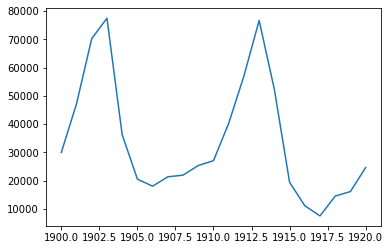

In [4]:
plt.plot(forest.year, forest.hare) # первый аргумент - ось x, второй аргумент - ось y.

Чтобы построить столбчатую диаграмму - меняем функцию plot на bar. 
Все виды графиков и функций можно найти в документации matplotlib 
https://matplotlib.org/api/pyplot_summary.html

<BarContainer object of 21 artists>

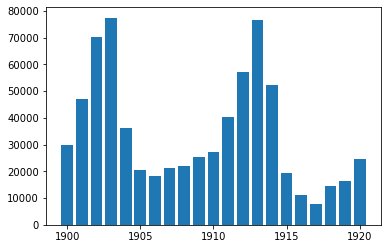

In [5]:
plt.bar(forest.year, forest.hare)

Давайте вернемся к нашему линейному график, сохраним его в переменной и попробуем сделать его посимпатичней. 

В идеальной вселенной мы создаем графики функцией subplots (которая может, например, создать систему из нескольких графиков) и сложить то, что она генириует в две переменные. Обычно их называют fig и ax.

Переменная fig (или как вы ее назвали. Тут главное, что это первая переменная, которую вы определили) отвечает за график вцелом. Воспринимайте ее как файл, который хранит график как картинку.

Переменная ax (так, которую мы определяем второй) - это ось координат, на которой мы собственно строим график. Мы можем настраивать внешний вид этого объекта (потому что все элементы графика хранятся как раз в ней).


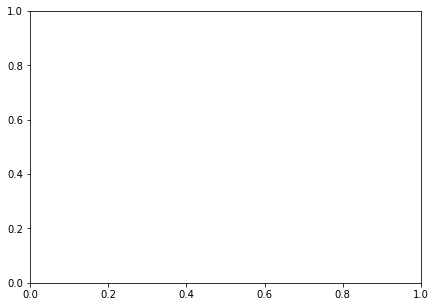

In [6]:
fig, ax = plt.subplots(1,1, figsize=(7,5)) # создали объект из 1 ряда 1 колонки графика (что сюрприз - один график!)
                                           # Размер - по сути это размер нашего прямоугольника в неочевидных единицах. 
                                           # Какой размер удачный? экспериментируйте!

Выше мы создали пустую шкалу координат. Давайте теперь попробуем наложить на нее график.

In [7]:
forest.head()  # вспомнили, какие переменные у нас есть.

,year,hare,lynx,carrot
0,1900,30000.0,4000.0,48300
1,1901,47200.0,6100.0,48200
2,1902,70200.0,9800.0,41500
3,1903,77400.0,35200.0,38200
4,1904,36300.0,59400.0,40600


Посмотрим, как выглядит наш график по умолчанию.

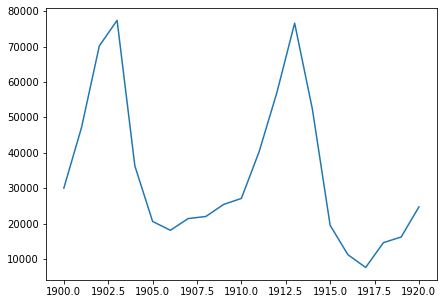

In [8]:
fig, ax = plt.subplots(1,1, figsize=(7,5)) # создаем переменную заново, чтобы вы точно стирали то, что в ней лежит на каждом шаге,
                                           # если вы захотите внести измения в код
ax.plot(forest.year, forest.hare)  # обратите внимание - график мы теперь строим как метод объекта ax. 
                                   # Ниже все модификации графика тоже применяем к объекту.


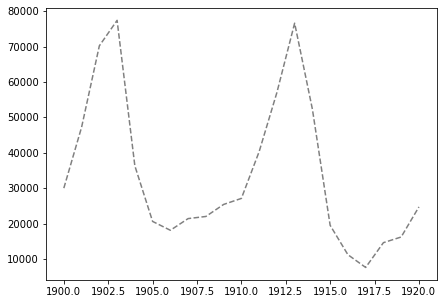

In [9]:
fig, ax = plt.subplots(1,1, figsize=(7,5)) 

# параметры самого графика (цвет линии, стиль и т.д.) определяем как параметры в методе plot()
# меняем цвет и стиль линии на пунктир. Matplotlib знает некоторые стандартные цвета, и их можно задать прямо словом
# так же можно передать hex цвет. Например, #8c92ac
ax.plot(forest.year, forest.hare, color = 'grey', ls = '--')  


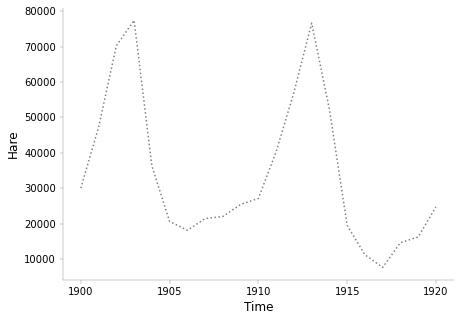

In [10]:
fig, ax = plt.subplots(1,1, figsize=(7,5)) 

# параметры самого графика (цвет линии, стиль и т.д.) определяем как параметры в методе plot()
# меняем цвет и стиль линии на пунктир. Matplotlib знает некоторые стандартные цвета, и их можно задать прямо словом
# так же можно передать hex цвет. Например, #8c92ac
ax.plot(forest.year, forest.hare, color = 'grey', ls = ':')  


# если вы обратили внимание, то в нашем самом первом графике шкала с годами сломамлась и стала float. Matplotlib принудительно 
# делает x непрерывной переменной для линейного графика. Мы хотим оставить шкалу год в целых числах.
ax.locator_params(integer=True) 

# называем шкалы x и y, выбираем размер шрифта.
ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Hare', fontsize=12)

# делаем правую и верхнюю границу графика невидимыми
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# делаем засечки на шкалах x и y потоньше
ax.xaxis.set_tick_params(width=0.2)
ax.yaxis.set_tick_params(width=0.2)

# уменьшаем толщину оставших границ графика с помощью цикла (можно и без цикла отдельной строкой для каждой границы, как делали выше)
for spine in ['bottom','left']:
    ax.spines[spine].set_linewidth(0.2)

Больше видов графиков и параметров, которые мы можем изменять - в документации Matplotlib. 

## Упражнение
Сейчас мы посмотрим, как создавать систему графиков и попробуем построить тренды для всех обитателей нашего леса.


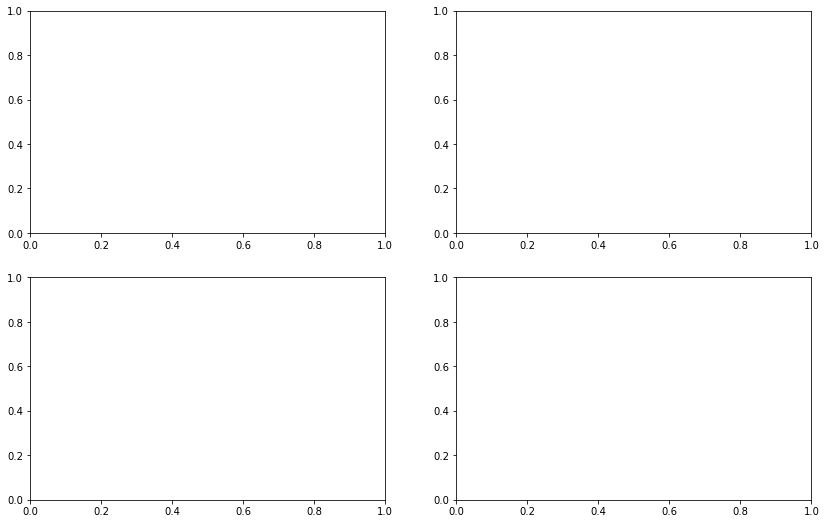

In [11]:
fig, ax = plt.subplots(2,2, figsize=(14,9)) # увеличиваем количество объектов до двух рядов и двух колонок. Также увеличиваем размер изображения.

Класс, теперь у нас есть четыре графика. Теперь объект ax - это некоторая матрица (или вложенный список - как вам удобнее воспринимать). И чтобы обратиться к каждому графику, нужно обратиться к нему по индексу.


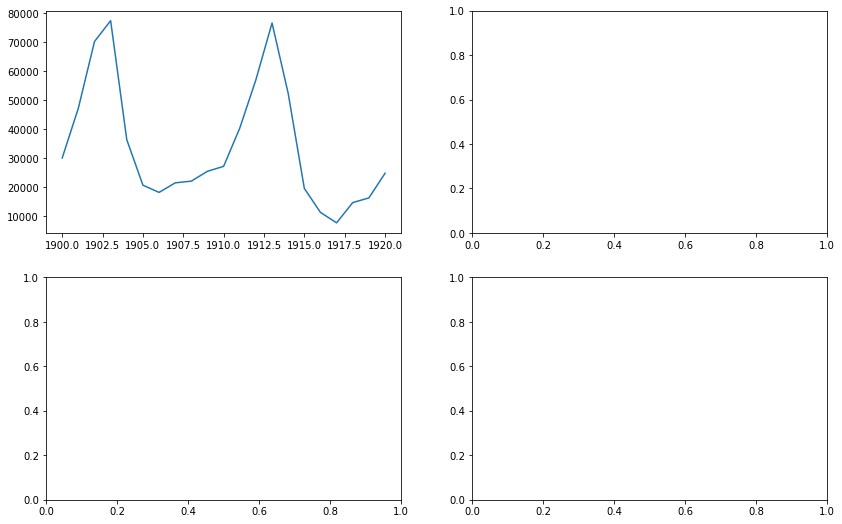

In [12]:
fig, ax = plt.subplots(2,2, figsize=(14,9))
ax[0][0].plot(forest.year, forest.hare)  # Обращаемся к первому графику в первой колонке.

Ниже посмотрим как с помощью цикла for можно применить какую-то модификацию ко всем графикам системы.

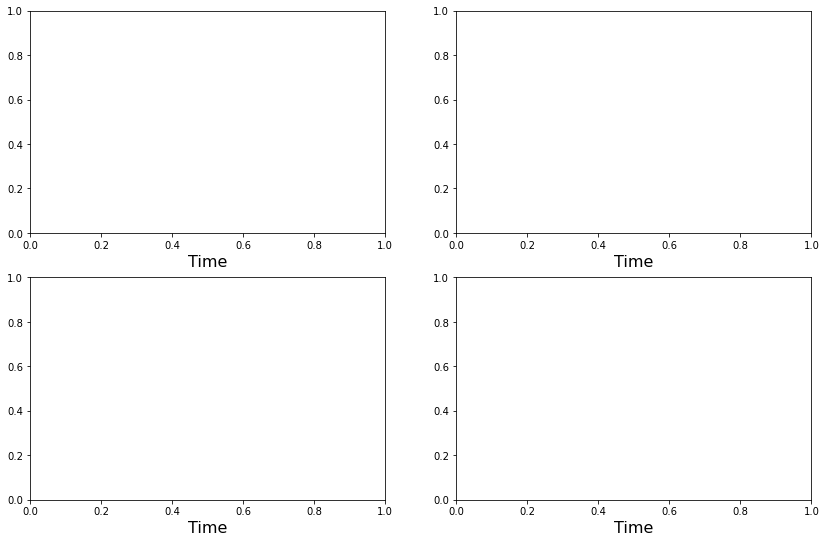

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(14,9))

for x in range(2):
    for y in range(2):
        ax[x][y].set_xlabel('Time', fontsize = 16)

**Задание (10 минут):**

* Нарисуйте во втором графике изменения в популяции рысей.
* В третьем - морковки.
* В четвертом - все три графика вместе (подумайте как).
* Каждый график должен быть разного цвета. В четвертом графике - каждый график должен быть такого же цвета, как и в своей ячейке.
* Подпишите шкалы y и x для каждого графика.

Если вы знаете цикл for - попробуйте написать цикл, который бы массово применял изменения во внешнем виде графика (например, удалял бы верхние и правые границы у всех графиков)



**Пример решения:**

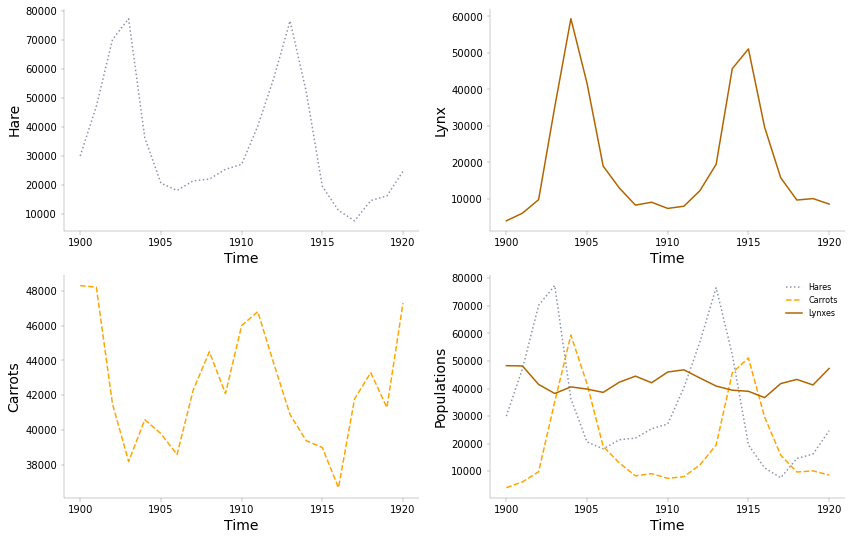

In [46]:
fig, ax= plt.subplots(2, 2, figsize=(14,9))

for x in range(2):
    for y in range(2):
        ax[x][y].set_xlabel('Time', fontsize=14)
        ax[x][y].locator_params(integer=True)
        ax[x][y].spines['right'].set_visible(False)
        ax[x][y].spines['top'].set_visible(False)
        ax[x][y].xaxis.set_tick_params(width=0.2)
        ax[x][y].yaxis.set_tick_params(width=0.2)
        for axis in ['top','bottom','left','right']:
            ax[x][y].spines[axis].set_linewidth(0.2)

        
ax[0][0].plot(forest.year, forest.hare, color='#8c92ac', ls = ':')
ax[0][0].set_ylabel('Hare', fontsize=14)
#ax[0][0].set_xticks(forest.year.unique())


ax[1][0].plot(forest.year, forest.carrot, color='#ffa500', ls = '--')
ax[1][0].set_ylabel('Carrots', fontsize = 14)

ax[0][1].plot(forest.year, forest.lynx, color='#b06500', ls = '-'); 
ax[0][1].set_ylabel('Lynx', fontsize = 14)

ax[1][1].plot(forest.year, forest.hare, label = 'Hares', color='#8c92ac', ls = ':')
ax[1][1].plot(forest.year, forest.lynx, label = 'Carrots', color='#ffa500', ls = '--')
ax[1][1].plot(forest.year, forest.carrot, label = 'Lynxes', color='#b06500', ls = '-')
ax[1][1].set_ylabel('Populations', fontsize = 14)
ax[1][1].legend(loc=1, fontsize=8, frameon=False) # задаем легенду. loc отвечает за ее местоположение (экспериментируйте!), frameon - налиичие рамки вокруг легенды.



In [15]:
# сохраняем график. Если не зададите путь - сохранится в ту папку, которую сейчас jupyter считает рабочей 
# (то, что вы видете на первом экране в браузере, когда запускаете jupyter)
fig.savefig("my_new_plot.png") 

# Мультивариативный график рассеяния (multivariate scatter plot): преступления в США

Сейчас будем работать с наборам данных, который содержит информацию о количестве преступлений в штатах США в 2005 году. 

In [16]:
crimes = pd.read_csv('https://raw.githubusercontent.com/rogovich/Data/master/data/crimeRatesByState2005.tsv', sep='\t')  # тут разделитель - тоже табуляция
crimes.head()

,state,murder,Forcible_rate,Robbery,aggravated_assult,burglary,larceny_theft,motor_vehicle_theft,population
0,Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3,4627851
1,Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0,686293
2,Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4,6500180
3,Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1,2855390
4,California,6.9,26.0,176.1,317.3,693.3,1916.5,712.8,36756666


Давайте начнем с графика с двумя переменным. Тут все просто - непрерывная переменная по x, непрерывная переменная по y: а точка на пересечении значений x и y - место нашего штата в этой системе  координат. Давайте для начала построим график для убийств и ограблений. График рассеяния можно использовать и для категориальных переменных - посмотрим на другом примере.

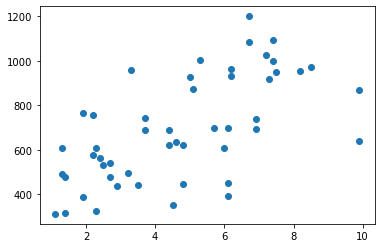

In [17]:
fig, ax = plt.subplots()  # если нужно создать один график, то можем не указывать количество в аргументах
ax.scatter(crimes['murder'], crimes['burglary'])  # вместо метода plot используем scatter

Попробуйте проинтерпретировать график выше. Дальше мы попробуем закодировать в нем еще две переменные. Есть идеи как?

Мультивариативный график - это такой график, из которого мы можем считать значения для более чем двух переменных. Самый простой способ закодировать дополнительную информацию - цвет и размер точки. Давайте добавим значение переменной population (размер населения штата) на график как размер точки.

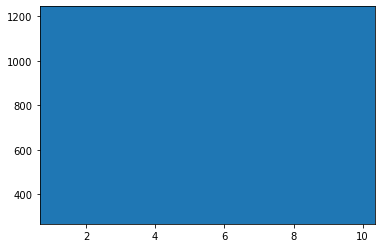

In [18]:
fig, ax = plt.subplots()

# добавляем параметр s (size) и говорим, какая переменная будет за него отвечать
ax.scatter(crimes['murder'], crimes['burglary'], s = crimes['population'])  


Размер населения такой большой, что точка захватила всю область координат. Давайте попробуем нашу переменную масштабировать - нам же важны относительные размеры штатов относительно друг друга, а не абсолютные значения. Значения маштабирования тоже выбираем экспериментально: то, что лучше выглядит и более информативно.

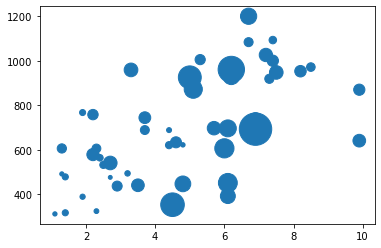

In [19]:
fig, ax = plt.subplots()
ax.scatter(crimes['murder'], crimes['burglary'], s = crimes['population']/35000)

Класс, только некоторые точки слились. Давайте добавим параметр прозрачности, чтобы было видно, где они накладываются друг на друга.

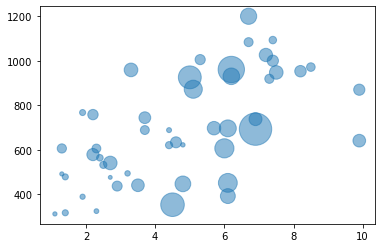

In [20]:
fig, ax = plt.subplots()
ax.scatter(crimes['murder'], crimes['burglary'], s = crimes['population']/35000, alpha = 0.5) # параметр alpha задает прозрачность точки от 0 до 1

Давайте попробуем проинтерпретировать этот график. А потом добавим еще какую-нибудь переменную в виде цвета.

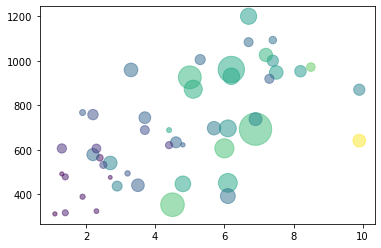

In [21]:
fig, ax = plt.subplots()
ax.scatter(crimes['murder'], crimes['burglary'], s = crimes['population']/35000, alpha = 0.5, 
           c = crimes['Robbery']) # задаем новый аргумент c (color) и присваиваем ему значение переменной

Осталось узнать, что значит какой цвет. Для этого нужно сохранить график в переменную и передать ее как аргумент функции colorbar().
Также можем поменять цветовую шкалу с помощью аргумента cmap (какие цветовые карты есть в matplotlib? Гуглим документацию!).

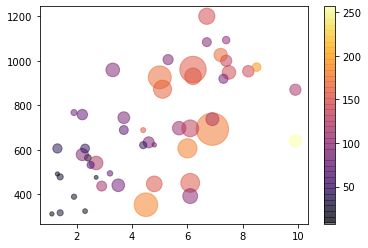

In [22]:
fig, ax = plt.subplots()
color_graph = ax.scatter(crimes['murder'], crimes['burglary'], s = crimes['population']/35000, alpha = 0.5, cmap = 'inferno',
           c = crimes['Robbery'])
plt.colorbar(color_graph)

Проинтерпретируем?

**Сделаем симпатичней и подпишем штаты**

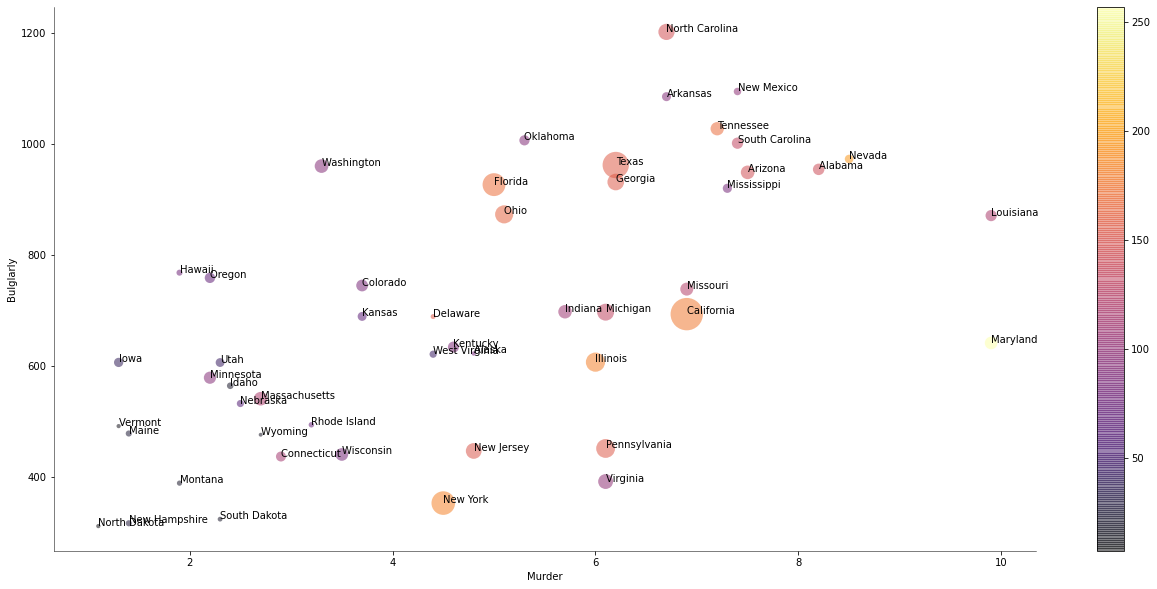

In [23]:
fig, ax = plt.subplots(figsize = (22,10))

color_graph = ax.scatter(crimes['murder'], crimes['burglary'], s = crimes['population']/35000, c = crimes['Robbery'], cmap = 'inferno', alpha = 0.5, linewidth = 0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

ax.set_xlabel('Murder', fontsize = 10)
ax.set_ylabel('Bulglarly', fontsize = 10)

for i, state in enumerate(crimes['state']):  # с помощью enumerate создаем из колонок с названиями штатов объект кортежей вида индекс - название штата.
    ax.annotate(state, (crimes['murder'][i], crimes['burglary'][i]), fontsize = 10) # используем метод annotate, которому говорим, что нужно брать имя штата
                                                                                    # из кортежа, который создали с помощью enumerate, а координаты подписи задаем через
                                                                                    # значения наших переменных x и y для нужного индекса из объекта enumerate (обращается к нужному
                                                                                    # ряду в датафрейме)
                
plt.colorbar(color_graph)
plt.savefig('crimes.png')  # сохраняем

In [24]:
# смотрим что внутри объекта enumerate()
list(enumerate(crimes['state']))

[(0, 'Alabama '),
 (1, 'Alaska '),
 (2, 'Arizona '),
 (3, 'Arkansas'),
 (4, 'California '),
 (5, 'Colorado '),
 (6, 'Connecticut '),
 (7, 'Delaware '),
 (8, 'Florida '),
 (9, 'Georgia '),
 (10, 'Hawaii '),
 (11, 'Idaho '),
 (12, 'Illinois '),
 (13, 'Indiana '),
 (14, 'Iowa '),
 (15, 'Kansas  '),
 (16, 'Kentucky  '),
 (17, 'Louisiana '),
 (18, 'Maine '),
 (19, 'Maryland '),
 (20, 'Massachusetts'),
 (21, 'Michigan'),
 (22, 'Minnesota '),
 (23, 'Mississippi '),
 (24, 'Missouri '),
 (25, 'Montana  '),
 (26, 'Nebraska '),
 (27, 'Nevada '),
 (28, 'New Hampshire '),
 (29, 'New Jersey'),
 (30, 'New Mexico '),
 (31, 'New York'),
 (32, 'North Carolina '),
 (33, 'North Dakota '),
 (34, 'Ohio '),
 (35, 'Oklahoma '),
 (36, 'Oregon '),
 (37, 'Pennsylvania'),
 (38, 'Rhode Island '),
 (39, 'South Carolina '),
 (40, 'South Dakota '),
 (41, 'Tennessee '),
 (42, 'Texas '),
 (43, 'Utah'),
 (44, 'Vermont '),
 (45, 'Virginia '),
 (46, 'Washington '),
 (47, 'West Virginia '),
 (48, 'Wisconsin '),
 (49, 'Wyom

# Графики для категориальных переменных: столбчатые диаграммы 

Тут будем работать по мотивам вот этого блокнота.

https://nbviewer.jupyter.org/github/yaph/ipython-notebooks/blob/master/movie-body-counts.ipynb

Бдуем работать с датасетом, который подсчитывает количество смертей в фильмах (меотодологию сбора данных можно посмотреть по ссылке выше). Несколько графиков мы рассмотрим на занятии, остальные можно изучить самостоятельно.

Очень часто для того, чтобы получить тот график, который хотим - нужно сделать правильную группировку. С этим тоже тут поработаем.


In [25]:
movies = pd.read_csv('https://raw.githubusercontent.com/rogovich/Data/master/data/bodycount_Directors_Genra.csv', index_col=0)
movies.head()

,Film,Year,Body_Count,MPAA_Rating,Genre,Director,Length_Minutes,IMDB_Rating,Film_Count,Body_Count_Min
0,24 Hour Party People,2002,7.0,R,Biography,Michael Winterbottom,117,7.3,1,0.059829
1,24 Hour Party People,2002,7.0,R,Comedy,Michael Winterbottom,117,7.3,1,0.059829
2,24 Hour Party People,2002,7.0,R,Drama,Michael Winterbottom,117,7.3,1,0.059829
3,24 Hour Party People,2002,7.0,R,Music,Michael Winterbottom,117,7.3,1,0.059829
4,28 Days Later,2002,53.0,R,Horror,Danny Boyle,113,7.6,1,0.469027


Обратите внимание, что мы работаем с таким датасетом, где один и тот же фильм может встречаться несколько раз (это связано с тем, что он может относиться к нескольким жанрам или имеет несколько режиссеров - эта информация добавляет дополнительные ряды). Поэтому при некоторых агрегациях будем выкидывать дубликаты из колонки Film, чтобы не было задвоения.

In [26]:
movies.shape # размер оригинального датафрейма

(1682, 10)

In [27]:
movies.drop_duplicates('Film').shape # размер датафрейма для уникальных фильмов

(537, 10)

Давайте сгруппируем фильмы по году и суммируем значения для того, чтобы построить столбчатый график.

## Агрегация по годам. Столбчатый график

Давайте построим два столбчатых графика, которые показывают количество фильмов за каждый год и общее количество смертей на экране.

In [28]:
movies_year = movies.drop_duplicates('Film').groupby('Year').sum()

In [29]:
movies_year.tail()

,Body_Count,Length_Minutes,IMDB_Rating,Film_Count,Body_Count_Min
Year,,,,,
2007,4095.0,5475,327.8,48,35.992220
2008,1785.0,2850,170.9,26,16.522174
2009,605.0,1235,75.3,11,5.708305
2010,519.0,463,29.0,4,4.528441
2013,156.0,119,6.5,1,1.310924


Text(0.5, 1.0, 'Total Body Count')

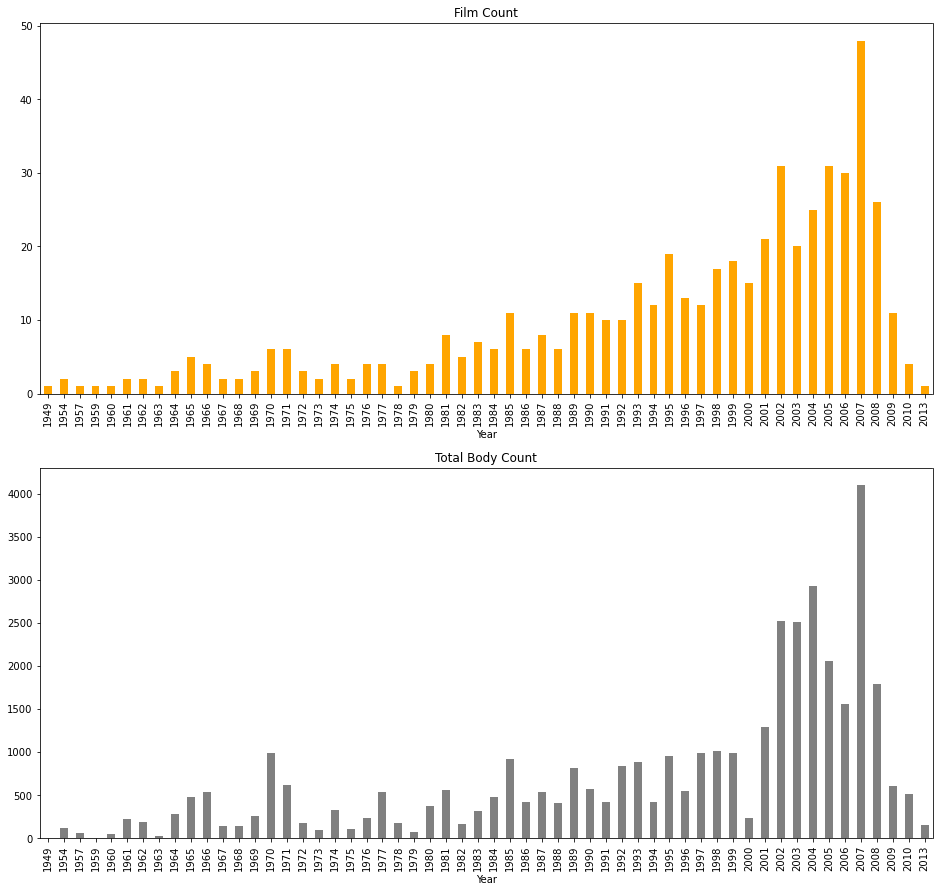

In [30]:
fig, ax = plt.subplots(2, 1, figsize=(16, 15))

# обратите внимание, что здесь меняем синтаксис - делаем график, применяем метод plot из пандас к колонке. 
# И уже в параметрах этого метода прописываем тип графика и ось координат, на которую хотим его положить. 
# При таком подходе у нас каждый год отобразится на оси координат

movies_year['Film_Count'].plot(kind='bar', ax=ax[0], color = '#ffa500')
ax[0].set_title('Film Count')

movies_year['Body_Count'].plot(kind='bar', ax=ax[1], color = 'grey')
ax[1].set_title('Total Body Count')

## Агрегация по фильмам. Сортировка по значения. Горизонтальный столбчатый график

Сейчас мы сгруппируем датасет по фильмам, найдем 10 самых жестоких и визуализируем их.

In [31]:
movies_film = movies.drop_duplicates('Film').set_index('Film') # агрегируем и делаем индексом название фильма, так как индекс станет шкалой
movies_film.head()

,Year,Body_Count,MPAA_Rating,Genre,Director,Length_Minutes,IMDB_Rating,Film_Count,Body_Count_Min
Film,,,,,,,,,
24 Hour Party People,2002,7.0,R,Biography,Michael Winterbottom,117,7.3,1,0.059829
28 Days Later,2002,53.0,R,Horror,Danny Boyle,113,7.6,1,0.469027
28 Weeks Later,2007,212.0,R,Horror,Juan Carlos Fresnadillo,100,7.0,1,2.120000
30 Days of Night,2007,67.0,R,Horror,David Slade,113,6.6,1,0.592920
300,2007,600.0,R,Action,Zack Snyder,117,7.7,1,5.128205


In [32]:
movies_film.sort_values(by=['Body_Count'])['Body_Count'].tail(10) # сортируем и берем 10 последних значений

Film
King Arthur                              378.0
Windtalkers                              389.0
Lord of the Rings: Two Towers            468.0
A Fistful of Dynamite                    471.0
The Last Samurai                         558.0
Troy                                     572.0
Tae Guk Gi: The Brotherhood of War       590.0
300                                      600.0
Kingdom of Heaven                        610.0
Lord of the Rings: Return of the King    836.0
Name: Body_Count, dtype: float64

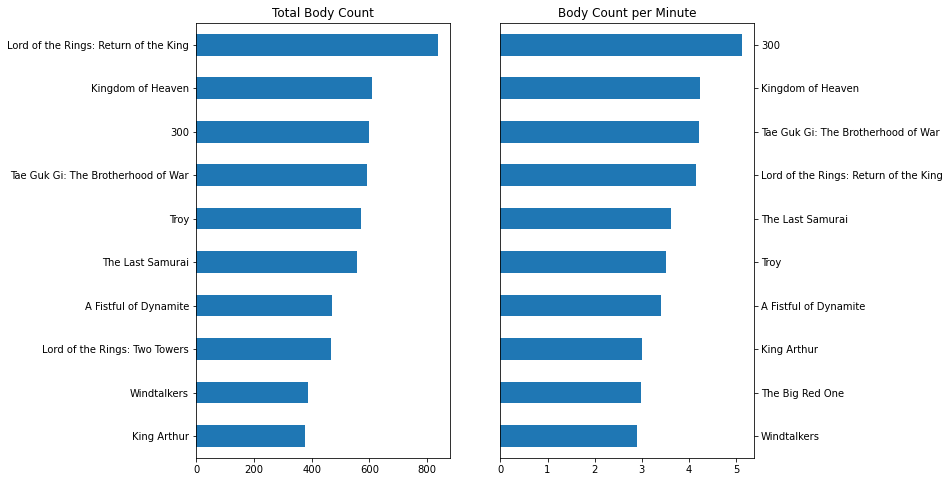

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(10, 8))

# график для количества убитых людей в фильме. Горизонтальный график делаем параметром barh (bar horizontal)
movies_film.sort_values(by=['Body_Count'])['Body_Count'].tail(10).plot(kind='barh', ax=ax[0]) 
ax[0].set_title('Total Body Count')

movies_film.sort_values(by=['Body_Count_Min'])['Body_Count_Min'].tail(10).plot(kind='barh', ax=ax[1]) # для количества убитых людей на минуту фильма

ax[1].set_title('Body Count per Minute')
ax[1].yaxis.set_ticks_position('right')

for i in range(2):
    ax[i].set_ylabel('', visible=False) # убираем подпись к шкале, которая генерируется автоматически
